<div style="clear: both; width: 100%; overflow: auto"><img src="img/yabox.png" style="width: 250px; float: left"/></div>

> Yabox: Yet another black-box optimization library for Python - https://github.com/pablormier/yabox

This notebook compares the performance of the Differential Evolution (DE) algorithm and the DE with parallel evaluation (PDE) implemented in [Yabox](https://github.com/pablormier/yabox) against the default [Scipy's implementation](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.optimize.differential_evolution.html) over a collection of common optimization functions.

Author: Pablo Rodríguez-Mier, [@pablormier](https://twitter.com/PabloRMier)

# Imports & boilerplate code

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
from time import time

# Load Yabox (from local)
sys.path.insert(0, '../')
import yabox as yb

import scipy as sp
import numpy as np

# Import the DE implementations
from yabox.algorithms import DE, PDE
from scipy.optimize import differential_evolution as SDE

In [2]:
print('Yabox version: ', yb.__version__)
print('Scipy version: ', sp.__version__)

Yabox version:  1.0.3
Scipy version:  0.19.1


# Default config

The initialization of the population in all cases (Yabox/Scipy) is random and the schema used is *rand/1/bin*

In [3]:
# Runs per method and function, average the final results
runs = 1
# Time limit for each method (in seconds)
stop_after = 2
# Max number of iterations
maxiters = 1000000
# Use a constant mutation factor (0-1)
mutation = 0.5
# Recombination probability (0-1)
recombination = 0.5
# Number of individuals in the population. NOTE: Since Scipy uses num_individuals = dimensions * popsize
# Select a size for popsize and a set of dimensions to test so that popsize / dimensions in every case 
# produces an integer number
popsize = 64
# Methods to be tested
methods = ['yabox_de', 'yabox_pde', 'scipy_de']

In [4]:
# Load boilerplate benchmark functions
%run -i 'benchmark-functions.py'

# Evaluation

In order to evaluate the performance of each implementation, I used 5 different multi-dimensional functions commonly used for benchmarking black-box optimization algorithms. All tests have been taken on a Intel(R) Core(TM) i7-3770 CPU @ 3.40GHz.

## Benchmark 1 - Ackley function

> "The [Ackley function](https://www.sfu.ca/~ssurjano/ackley.html) is widely used for testing optimization algorithms. In its two-dimensional form, as shown in the plot above, it is characterized by a nearly flat outer region, and a large hole at the centre. The function poses a risk for optimization algorithms, particularly hillclimbing algorithms, to be trapped in one of its many local minima."

Global minimum:

$ f(\mathbf{x^*}) = 0, \text{at}~\mathbf{x^*} = (0, \dots, 0) $

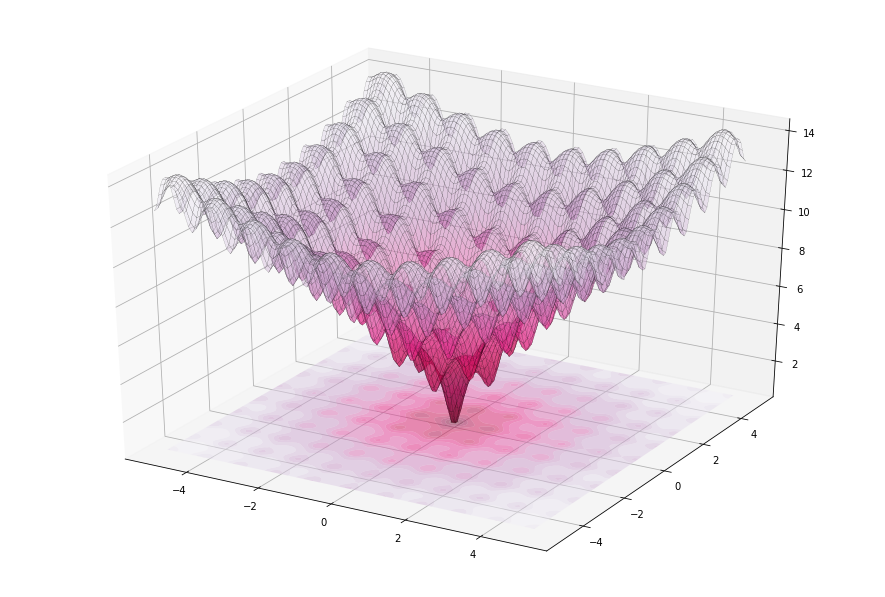

In [5]:
from yabox.problems import Ackley
Ackley().plot3d();

Running yabox_de on Ackley 2D (1 runs, 2 seconds per run)
Running yabox_pde on Ackley 2D (1 runs, 2 seconds per run)
Running scipy_de on Ackley 2D (1 runs, 2 seconds per run)


/home/remoto/pablo.rodriguez.mier/anaconda3/lib/python3.5/site-packages/scipy/optimize/_differentialevolution.py:533: RuntimeWarning: divide by zero encountered in double_scalars
  convergence=self.tol / convergence) is True):


Running yabox_de on Ackley 4D (1 runs, 2 seconds per run)
Running yabox_pde on Ackley 4D (1 runs, 2 seconds per run)
Running scipy_de on Ackley 4D (1 runs, 2 seconds per run)
Running yabox_de on Ackley 8D (1 runs, 2 seconds per run)
Running yabox_pde on Ackley 8D (1 runs, 2 seconds per run)
Running scipy_de on Ackley 8D (1 runs, 2 seconds per run)
Running yabox_de on Ackley 16D (1 runs, 2 seconds per run)
Running yabox_pde on Ackley 16D (1 runs, 2 seconds per run)
Running scipy_de on Ackley 16D (1 runs, 2 seconds per run)
Running yabox_de on Ackley 32D (1 runs, 2 seconds per run)
Running yabox_pde on Ackley 32D (1 runs, 2 seconds per run)
Running scipy_de on Ackley 32D (1 runs, 2 seconds per run)
Running yabox_de on Ackley 64D (1 runs, 2 seconds per run)
Running yabox_pde on Ackley 64D (1 runs, 2 seconds per run)
Running scipy_de on Ackley 64D (1 runs, 2 seconds per run)
Benchmark completed


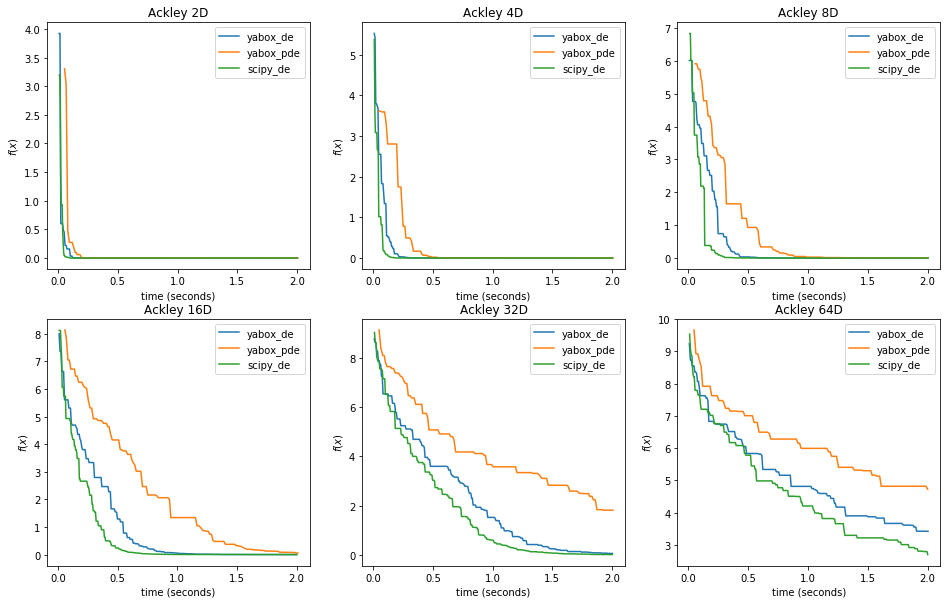

In [6]:
# Run the set of benchmarks on Ackley using the config defined at the beginning of this notebook
ackley_data = test(Ackley)

# Plot the performance of each algorithm (execution time vs. fitness)
plot_results(ackley_data)

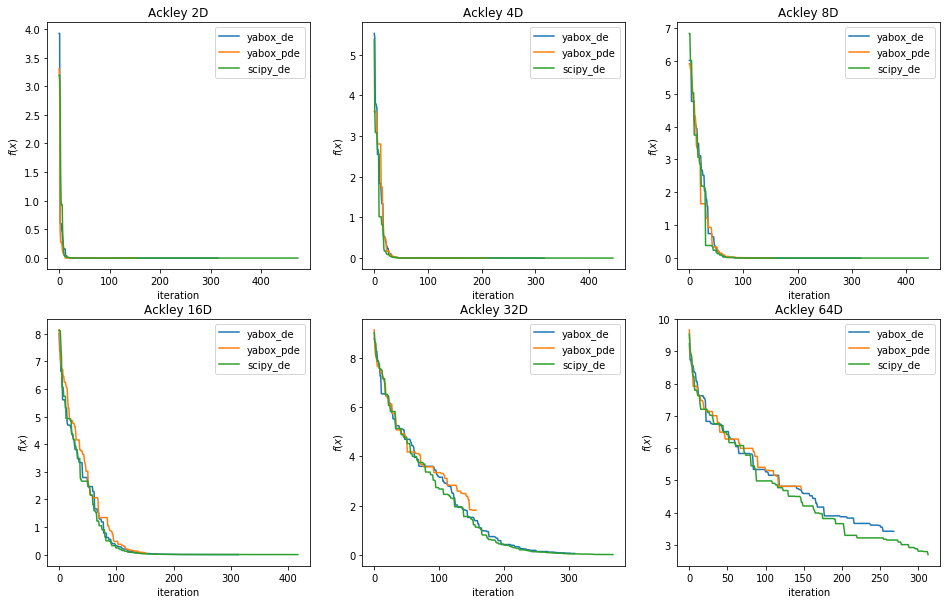

In [7]:
plot_results(ackley_data, use_time=False)

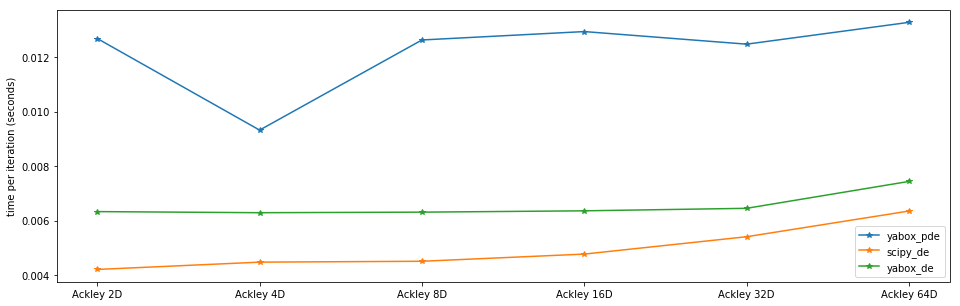

In [8]:
plot_time_per_iteration(ackley_data)

## Benchmark 2 - Rastrigin function

> *"The [Rastrigin function](https://www.sfu.ca/~ssurjano/rastr.html) has several local minima. It is highly multimodal, but locations of the minima are regularly distributed. It is shown in the plot in its two-dimensional form."*

Global minimum:

$ f(\mathbf{x^*}) = 0, \text{at}~\mathbf{x^*} = (0, \dots, 0) $

In [ ]:
from yabox.problems import Rastrigin
Rastrigin().plot3d();

In [ ]:
rastrigin_data = test(Rastrigin)
plot_results(rastrigin_data)

In [ ]:
plot_results(rastrigin_data, use_time=False)

In [ ]:
plot_time_per_iteration(rastrigin_data)

## Benchmark 3 - Schwefel function

> "The [Schwefel function](https://www.sfu.ca/~ssurjano/schwef.html) is complex, with many local minima. The plot shows the two-dimensional form of the function."

Global minimum:

$ f(\mathbf{x^*}) = 0, \text{at}~\mathbf{x^*} = (420.9687, \dots, 420.9687) $

In [ ]:
from yabox.problems import Schwefel
Schwefel().plot3d();

In [ ]:
schwefel_data = test(Schwefel)
plot_results(schwefel_data)

In [ ]:
plot_results(schwefel_data, use_time=False)

In [ ]:
plot_time_per_iteration(schwefel_data)

## Benchmark 4 - Michalewicz function

> "The [Michalewicz function](https://www.sfu.ca/~ssurjano/michal.html) has d! local minima, and it is multimodal. The parameter m defines the steepness of they valleys and ridges; a larger m leads to a more difficult search. The recommended value of m is m = 10."

In [ ]:
from yabox.problems import Michalewicz
Michalewicz().plot3d();

In [ ]:
michalewicz_data = test(Michalewicz)
plot_results(michalewicz_data)

## Benchmark 5 - Griewank function

> "The [Griewank function](https://www.sfu.ca/~ssurjano/griewank.html) has many widespread local minima, which are regularly distributed."

Global minimum:

$ f(\mathbf{x^*}) = 0, \text{at}~\mathbf{x^*} = (0, \dots, 0) $

In [ ]:
from yabox.problems import Griewank
Griewank().plot3d();

In [ ]:
griewank_data = test(Griewank)
plot_results(griewank_data)